# CPSC 330 - Applied Machine Learning 

## Homework 3: Preprocessing 
### Associated lectures: [Lectures 4, 5, 6](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday, Oct 04, 2021 at 11:59pm**

## Table of Contents

- [Instructions](#si)
- [Introduction](#in)
- [Exercise 1: Introducing the dataset](#1)
- [Exercise 2: Exploratory data analysis (EDA)](#2)
- [Exercise 3: Preprocessing](#3)
- [Exercise 4: Building models](#4)
- [Exercise 5: Evaluating on the test set](#5)

## Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## EDA

We will be using [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#) from Kaggle ("adult.csv" in this repository). This is a classification dataset with the task of predicting whether income exceeds 50K per year given the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

In [2]:
census_df = pd.read_csv("adult.csv")
census_df.shape

(32561, 15)

### 1.1 Data splitting 

We will split the data into `train_df` (60%) and `test_df` (40%) with a fixed `random_state` so that results are consistent between users. The training set is somewhat small because it's a large dataset and my laptop is not that powerful.

In [3]:
train_df, test_df = train_test_split(census_df, test_size = 0.4, random_state = 42)

<br><br>

Let's examine our `train_df`. 

In [4]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census. We will replace them with `np.nan` before carrying on.

In [5]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(19536, 15)

In [6]:
train_df_nan.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K


The "?" symbols are now replaced with NaN values. 

<br><br>

### 2.1 Visualizing features

Let's investigate some basic summary statistics of all the features, and visualize the histograms of numeric features. From the visualizations, we should be able to predict which features seem relevant for the classification task.

In [7]:
train_df_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19536 entries, 25823 to 23654
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19536 non-null  int64 
 1   workclass       18428 non-null  object
 2   fnlwgt          19536 non-null  int64 
 3   education       19536 non-null  object
 4   education.num   19536 non-null  int64 
 5   marital.status  19536 non-null  object
 6   occupation      18424 non-null  object
 7   relationship    19536 non-null  object
 8   race            19536 non-null  object
 9   sex             19536 non-null  object
 10  capital.gain    19536 non-null  int64 
 11  capital.loss    19536 non-null  int64 
 12  hours.per.week  19536 non-null  int64 
 13  native.country  19187 non-null  object
 14  income          19536 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.4+ MB


In [10]:
train_df_nan.describe(include="all")

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,19536.000000,18428,1.953600e+04,19536,19536.000000,19536,18424,19536,19536,19536,19536.000000,19536.000000,19536.000000,19187,19536
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,13570,NaN,6256,NaN,9025,2490,7937,16676,13079,NaN,NaN,NaN,17517,14841
mean,38.592547,NaN,1.892662e+05,NaN,10.084767,NaN,NaN,NaN,NaN,NaN,1090.443540,86.537162,40.532606,NaN,NaN
std,13.638971,NaN,1.049020e+05,NaN,2.580723,NaN,NaN,NaN,NaN,NaN,7449.700833,402.395668,12.406636,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.177670e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.782835e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.368860e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [11]:
numeric_features = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]

In [12]:
X_pos = train_df_nan[train_df_nan.income == '<=50K']
X_neg = train_df_nan[train_df_nan.income == '>50K']

# Check that we got all the values
assert(X_pos.shape[0] + X_neg.shape[0] == train_df_nan.shape[0]) 

In [13]:
X_feat_pos = np.zeros([X_pos.shape[0], len(numeric_features)])
X_feat_neg = np.zeros([X_neg.shape[0], len(numeric_features)])

for j, feat in enumerate(numeric_features):
    
    X_feat_pos[:,j] = [X_pos[[feat]].iloc[i][0] for i in range(X_pos.shape[0])]
    X_feat_neg[:,j] = [X_neg[[feat]].iloc[i][0] for i in range(X_neg.shape[0])]

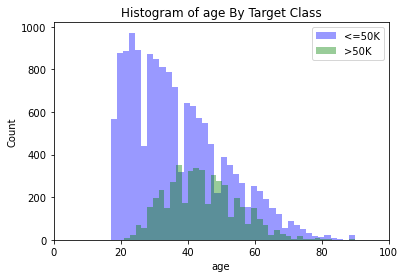

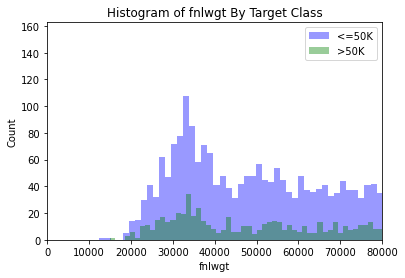

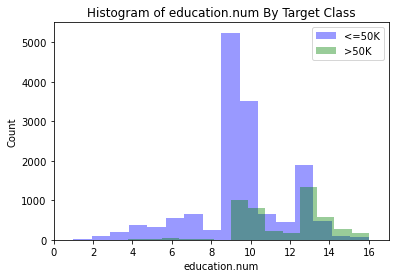

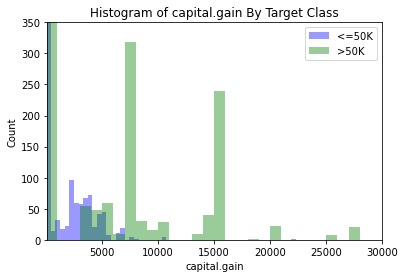

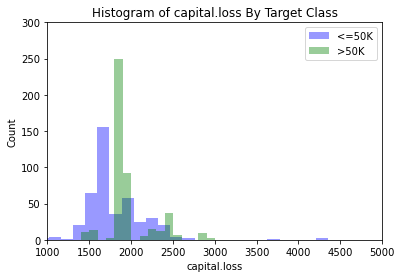

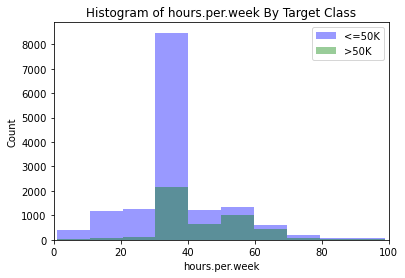

In [14]:
#Did this part in a separate loop so I could adjust
#the number of bins and x-limits in each plot without having
#to recalculate everything

bin_num = [40,1000,16,100,30,10]

#this gets rid of some of the extreme values of the data but those are rare
#and just make the plots harder to visualize properly
x_limit = [[0,100], [0,80000], [0,17], [100,30000], [1000,5000], [0,100]] 
y_limit = [None, None, None, [0,350], [0,300], None]

for j, feat in enumerate(numeric_features):
    
    plt.figure()
    plt.hist(X_feat_pos[:,j], bins = bin_num[j], color = "b", alpha = 0.4, label = "<=50K")
    plt.hist(X_feat_neg[:,j], bins = bin_num[j], color = "g", alpha = 0.4, label = ">50K")
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.title("Histogram of %s By Target Class" %feat)
    plt.xlim(x_limit[j])
    plt.ylim(y_limit[j])
    plt.legend()
    
plt.show()

<br><br>

<b>Comments:</b>

Important note: I decided to get rid of the $0 bins for capital gains and losses. Both <=50K and >50K earners were so plentiful in this box that it made it impossible to see the distribution of people who had a nonzero gain or loss.

Based on the histograms above, it seems that age would be the best feature for our task of classifying whether a person makes over $50k per year. This is because the distributions are obviously different (younger people tend to be paid less), and thus there is information from this feature which can be used in making our predictions.

There might also be some useful information in capital gains/losses. It looks like people who earn >50K tend to both gain more and lose more. This makes intuitive sense; people with higher salaries will have more money to invest in the stock market. 

In addition, in the hours per week plot, while both histograms may look somewhat similar, upon observation we see that the vast majority of people who make under 50k work 35-40 hours per week, while in the groups of >$50K earners, a larger proportion of them work over 40 hours per week (in other words, the green distribution is flatter while the blue one is sharper). 

Similarly, the education plot shows a sharper spike in the 9-11 range for the under 50K earners than the over 50K earners, and the the 13 bin shows a larger spike (relative to the rest of the distribution) for hte >50K earners than the <=50K earners.

### Transformations

In [18]:
#Used these few two cells to investigate each of the features.
train_df_nan[["capital.loss"]].describe(include="all")

,capital.loss
count,19536.000000
mean,86.537162
std,402.395668
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4356.000000


In [19]:
train_df_nan[["capital.loss"]]

,capital.loss
25823,0
10274,0
27652,0
13941,0
31384,0
...,...
29802,0
5390,0
860,1887
15795,0


In [20]:
train_df_nan[["native.country"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19536 entries, 25823 to 23654
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   native.country  19187 non-null  object
dtypes: object(1)
memory usage: 305.2+ KB


| Feature | Transformation |
| --- | ----------- |
| occupation | Imputation, OHE |
| age | Scaling |
| workclass | Imputation, OHE |
| fnlwgt | Scaling |
| education | OHE |
| education.num | Scaling |
| marital.status | OHE |
| relationship | OHE |
| race | OHE |
| sex | OHE |
| capital.gain | Scaling |
| capital.loss | Scaling |
| hours.per.week | Scaling |
| native.country | Imputation, OHE |


In [21]:
numeric_features = ["age", "fnlwgt", "education.num", "hours.per.week"]
categorical_features = ["occupation", "workclass", "education", "marital.status", 
                       "relationship", "race", "native.country"]#I was going to make education ordinal, but it's not clear how to order masters/doctorate vs. prof school

binary_features = ["sex"] #This is biological sex (not gender) and as the data is presented it is binary
drop_features = [] #I would consider dropping "occupation" if there were approximately n unique values, but there are only 14.
impute_features = ["occupation", "workclass", "native.country"]
passthrough_features = ["capital.gain", "capital.loss"] #These are sparse features
target = "income"

<b>Remark on ethics:</b> I do not think that investigating any statistic is inherently ethically wrong. For example, in my opinion it would be okay for a researcher in the social sciences to investigate whether there exists a correlation between race and salary. However, if you knew this model was going to be used by a company to aid in determining whether or not to approve a loan, the model should be fairly explainable and that sort of decision should be based purely on financial features (not on race/gender/etc). 

<br><br>

### Separating feature vectors and targets  

In [22]:
X_train = train_df_nan.drop(["income"], axis=1)
X_test = test_df_nan.drop(["income"], axis=1)
y_train = train_df_nan[["income"]]
y_test = test_df_nan[["income"]]

<br><br>

## Preprocessing 

### Preprocessing

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`.

In [23]:
imp_ohe_pipeline = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="most_frequent"),
                                OneHotEncoder(handle_unknown="ignore", dtype=int))

In [24]:
preprocessor = make_column_transformer(
    (imp_ohe_pipeline, categorical_features+impute_features), #doesn't hurt to impute features that don't necessarily need it
    (StandardScaler(), numeric_features)
)

In [25]:
X_train_trans = preprocessor.fit_transform(X_train)
X_train_trans = pd.DataFrame(X_train_trans.toarray())
print("The shape of the data is:")
X_train_trans.shape

The shape of the data is:


(19536, 164)

The number of features has increased from 14 to 164. This comes from the encoding. Every categorical features with $m$ categories has been turned into $m$ distinct features. Note that we needed to use a column transformer because each column needs a unique treatment. If we simply used a pipeline, we'd be using the wrong transformers on certain columns (for example, OHE on data that's already numerical, or scaling on non-numerical data).

<br><br>

## Building models

In [26]:
results_dict = {} # dictionary to store all the results

In [27]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<br><br>

### 4.1 Baseline model 

We will use `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as our baseline model, against which our actual models will be compared.

In [28]:
dc = DummyClassifier(strategy = "prior")

pipe = make_pipeline(preprocessor, dc)

results_dict["dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5)

dummy_cv = pd.DataFrame(results_dict["dummy"], columns = ["DummyClassifier"])
dummy_cv

,DummyClassifier
fit_time,0.083 (+/- 0.005)
score_time,0.027 (+/- 0.008)
test_score,0.760 (+/- 0.000)


The dummy classifier actually does fairly well, and this is just because the majority of people in the dataset make under \$50K.

<br><br>

### Trying Different Classifiers

In [29]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

for model_name in list(models.keys()):
    
    pipe = make_pipeline(preprocessor, models[model_name])
    
    results_dict[model_name] = mean_std_cross_val_scores(pipe, X_train, np.ravel(y_train), cv=5)

In [30]:
result_df = pd.DataFrame()
for model_name in list(models.keys()):
    result_df[model_name] = results_dict[model_name]
    
result_df

,Decision Tree,kNN,RBF SVM
fit_time,0.639 (+/- 0.024),0.097 (+/- 0.018),11.723 (+/- 0.689)
score_time,0.031 (+/- 0.010),4.163 (+/- 0.330),1.468 (+/- 0.108)
test_score,0.779 (+/- 0.002),0.822 (+/- 0.006),0.836 (+/- 0.005)


The overall fastest model is the decision tree. kNN is quite fast during fit (since it's not really doing anything during fit except storing the data), and slower during prediction (since this is where it computes all the distances). For the SVM, once we have the support vectors, this saves massive amounts of time during the predict phase.

As for accuracy, the decision tree is not much better than the dummy classifier. On the other hand kNN performs better, and as expected, SVM performs even better still. Of course, this is just with the default settings on each model, and no hyperparameter tuning.

<br><br>

### 4.4 Hyperparameter optimization

Let's carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. 

In [31]:
#Quite slow, so I am not checking many parameters, but in a real setting obviously
#one would want to optimize over a much denser grid and also over various kernels.
param_grid = {"C": np.logspace(-2, 2, 4)}

In [32]:
for c in param_grid["C"]:
    
    pipe = make_pipeline(preprocessor, SVC(C=c))
    
    results_dict["SVM (C=%.3f)"%(c)] = mean_std_cross_val_scores(pipe, X_train, np.ravel(y_train), cv=5)

In [33]:
SVM_result_df = pd.DataFrame()
for c in param_grid["C"]:
    SVM_result_df["SVM (C=%.3f)"%(c)] = results_dict["SVM (C=%.3f)"%(c)]
    
SVM_result_df

,SVM (C=0.010),SVM (C=0.215),SVM (C=4.642),SVM (C=100.000)
fit_time,12.069 (+/- 0.989),11.053 (+/- 0.674),14.522 (+/- 1.335),34.744 (+/- 2.946)
score_time,1.807 (+/- 0.273),1.455 (+/- 0.116),1.470 (+/- 0.213),1.410 (+/- 0.094)
test_score,0.821 (+/- 0.005),0.833 (+/- 0.004),0.838 (+/- 0.004),0.814 (+/- 0.006)


The hyperparameter which seems to be performing best is $C=4.64$. It has better accuracy than the default value of $C=1$ as we saw in question 4.2, and the standard deviation of the accuracy does not change by much.

<br><br>

## Evaluating on the test set 

Now that we have a best performing model, we can check the performance on the test set.

In [34]:
C_best = param_grid["C"][2]

sv = SVC(C=C_best)

pipe = make_pipeline(preprocessor, sv)
pipe.fit(X_train, np.ravel(y_train));

In [35]:
accuracy = pipe.score(X_test, y_test)

In [36]:
print("Using C = %.3f, the test score of SVM is %.3f, while the cross-validation score was %s" %(C_best,accuracy,SVM_result_df.iloc[2][2]))

Using C = 4.642, the test score of SVM is 0.834, while the cross-validation score was 0.838 (+/- 0.004)


<br><b>Remark:</b> The cross validation accuracy is very similar to the test accuracy, which is very good as it indicates our approximation error is quite low. 